# Image classification with Convolutional Neural Networks
## Sign Language

Date: 1st May 2018

The idea is to make a Deep Learning model that can predict the sign language. To start with in phase 1 I'll just train it to identify the 10 digits 1-9

http://www.lifeprint.com/asl101/pages-signs/n/numbers.htm

To create samples of the images. I have used OpenCV and captured the images via the laptops camera. 
These images were then uploaded to the Paperspace VM

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

The next few steps will create the train & test dataset from my original dataset. 
Date: 01st May 2018 :: As of now only a few images for 1-5 have been uploaded to see if I can get a minimum viable product (MVP)
Later will add more images to complete the entire set ( a-zA-Z and 0-9)

In [6]:
#########################################################################################
## Preprocessing Steps: 
## 1) Create Test & Train dataset
## 2) Use 80% of the data for training the remaining will be test data (80-20)
#########################################################################################

In [7]:
import os 

#PATH = f'data_Signs/'
PATH = f'C:\\OpenCV\\Project Folder\\'

# Create train & test folders

if not os.path.exists(f'{PATH}train'):
    os.makedirs(f'{PATH}train')
if not os.path.exists(f'{PATH}test'):
    os.makedirs(f'{PATH}test')

In [8]:
# Get all the classes in the directory
trainClasses = os.listdir(f'{PATH}signs')
trainClasses

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H']

In [9]:
# Cleaning directories 
import os
from shutil import copyfile
import random

for classes in trainClasses:
    fileName = os.listdir(f'{PATH}signs'+'//'+classes)
    print("Class: ", classes)
    print(len(fileName))
    sizeTrain = int(len(fileName)*0.8)
    
    random.shuffle(fileName)
    
    # Create folders for dataPoints
    if not os.path.exists(f'{PATH}train//'+classes):
        os.makedirs(f'{PATH}train//'+classes)
    if not os.path.exists(f'{PATH}test//'+classes):
        os.makedirs(f'{PATH}test//'+classes)
    
    for idx in range(len(fileName)):
        
        srcPath = PATH+'signs//'+classes+'//' + fileName[idx]
        if idx < sizeTrain:
            dstPath = PATH +'train//' + classes +'//'+fileName[idx]
        else:
            dstPath = PATH +'test//' + classes +'//'+fileName[idx]
            
        copyfile(srcPath, dstPath)

Class:  0
477
Class:  1
521
Class:  2
795
Class:  3
859
Class:  4
884
Class:  5
582
Class:  6
343
Class:  7
604
Class:  8
529
Class:  9
692
Class:  A
817
Class:  B
0
Class:  C
0
Class:  D
0
Class:  E
0
Class:  F
0
Class:  G
0
Class:  H
0


In [10]:
def get_data(sz,bs):
    tfms=tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom =1.3)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name='train', val_name = 'test', num_workers = 4)
    return data if sz > 300 else data.resize(340, 'tmp')
    #return data

Before using a different architecture don't forget to download the pre-computed weights into the weights folder
wget http://files.fast.ai/models/weights.tgz

In [11]:
# Uncomment the below if you need to reset your precomputed activations
shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [22]:
#PATH = f'data_Signs/'
bs =  4
sz = 120 # From above data vizualization on image size
arch= resnext101_64  ## resnet34 - This was giving an accuracy of around 60%

In [23]:
data = get_data(sz, bs)  

In [24]:
import os

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

RuntimeError: cuda runtime error (2) : out of memory at c:\anaconda2\conda-bld\pytorch_1519501749874\work\torch\lib\thc\generic/THCStorage.cu:58

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|████████▉ | 53/59 [00:00<00:00, 60.53it/s, loss=4.36] 


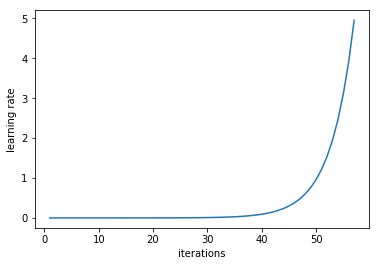

In [15]:
lrf=learn.lr_find()
learn.sched.plot_lr()

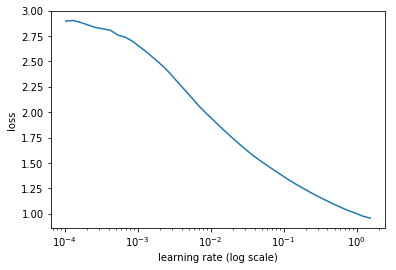

In [16]:
learn.sched.plot() # For classes 1-5: Using 0.1 for the learning rate
                    # For classes 0-9: Again using 0.08 for the learning rate

In [17]:
lrf = 0.08 
%time learn.fit(lrf, 4 )

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.110929   0.017254   0.997024  
    1      0.056948   0.080347   0.994048                   
    2      0.055551   0.137605   0.991071                   
    3      0.058095   0.038484   0.997024                   

CPU times: user 3.56 s, sys: 2.82 s, total: 6.38 s
Wall time: 4.58 s


[0.038484056, 0.9970238095238095]

In [19]:
lrf = 0.08
%time learn.fit(lrf, 3 ) # The validation and training loss are very encouraging!
                         # 2      0.035845   0.037668   0.997024 

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.037857   0.040421   0.997024  
    1      0.025935   0.131799   0.990327                   
    2      0.017037   0.01166    0.999256                   

CPU times: user 2.52 s, sys: 1.86 s, total: 4.38 s
Wall time: 3.23 s


[0.011660241, 0.9992559523809523]

In [20]:
%time learn.fit(lrf, 4, cycle_len=1, cycle_mult=3 )

HBox(children=(IntProgress(value=0, description='Epoch', max=40), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.027429   0.055483   0.99628   
    1      0.024763   0.073392   0.993304                   
    2      0.03139    0.037803   0.99628                    
    3      0.033793   0.017507   0.998512                   
    4      0.023394   0.031068   0.997768                   
    5      0.030592   0.077047   0.993304                   
    6      0.019158   0.07513    0.994792                   
    7      0.016951   0.042941   0.99628                    
    8      0.014833   0.052222   0.997024                   
    9      0.022858   0.093557   0.99256                    
    10     0.029246   0.022086   0.997768                   
    11     0.017842   0.079743   0.993304                   
    12     0.022203   0.047269   0.99628                    
    13     0.027446   0.024383   0.997768                   
    14     0.039437   0.055892   0.994792                   
    15     0.035408   0.061376   0.994792

[0.023692157, 0.9977678571428571]

The model seems good. as training and test errors are quite similar 

39     0.018122   0.023692   0.997768

In [21]:
# 1st May 2018 - Saving model
learn.save('cax_final_01052018_2130')

Creating a confusion matrix

In [22]:
learn.load('cax_final_01052018_2130')
log_preds,y = learn.TTA()

probs = np.mean(np.exp(log_preds),0)
preds = np.argmax(probs, axis=1)

[[ 96   0   0   0   0   0   0   0   0   0]
 [  0 110   0   0   0   0   0   0   0   0]
 [  0   0 114   0   0   0   0   0   0   0]
 [  0   0   0 160   0   0   0   0   0   0]
 [  0   0   0   0 197   0   0   0   0   0]
 [  0   0   0   0   0 219   0   0   0   0]
 [  0   0   0   0   0   0  69   0   0   0]
 [  0   0   0   0   0   0   0 121   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   0   0 139]]


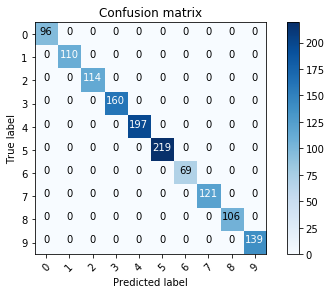

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [24]:
fileName = os.listdir(PATH+'test//5//')
img = open_image(PATH+'test//5//'+ fileName[5])
#plt.imshow(img)

In [25]:
trn_tfms, val_tfms = tfms_from_model(arch,sz) # get transformations
im = val_tfms(img)
learn.precompute=False # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
np.argmax(preds) # preds are log probabilities of classes

5